# Analyze tdms Files

## Goals

1. Read in the tdms files
2. Plot the data in a single tdms fil3
    * plot the peaks as well, if this data is given
3. Plot all of the data, in all of the files, as subplots
4. Add the data, in quadature, to see if I get the behavior that is exhibited in the csv files.
    * create subplots of all of this data.
5. Do Peak Analyses
    * check for lorentzian behavior, and see which peaks exhibit it. 

## Imports & Global Variables

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nptdms import TdmsFile


#%matplotlib qt
%matplotlib inline

pd.set_option('display.max_columns', 50) # display all columns
#pd.set_option('display.max_rows', 10)    # display some rows


directory = "../../2-Files_To_Analyze/31 May 18 TaV2/"
exten = ".tdms"

## Read In A File & Make a Plot

In [2]:
!ls ../../2-Files_To_Analyze/31\ May\ 18\ TaV2/

053108_temp_index.csv
sp001_053118_TaV2_300.0K_800-1200kHz.tdms
sp002_053118_TaV2_295.0K_800-1200kHz.tdms
sp003_053118_TaV2_290.0K_800-1200kHz.tdms
sp004_053118_TaV2_285.0K_800-1200kHz.tdms
sp005_053118_TaV2_280.0K_800-1200kHz.tdms
sp006_053118_TaV2_275.0K_800-1200kHz.tdms
sp007_053118_TaV2_270.0K_800-1200kHz.tdms
sp008_053118_TaV2_265.0K_800-1200kHz.tdms
sp009_053118_TaV2_260.0K_800-1200kHz.tdms
sp010_053118_TaV2_255.0K_800-1200kHz.tdms
sp011_053118_TaV2_250.0K_800-1200kHz.tdms
sp012_053118_TaV2_245.0K_800-1200kHz.tdms
sp013_053118_TaV2_240.0K_800-1200kHz.tdms
sp014_053118_TaV2_235.0K_800-1200kHz.tdms
sp015_053118_TaV2_230.0K_800-1200kHz.tdms
sp016_053118_TaV2_225.0K_800-1200kHz.tdms
sp017_053118_TaV2_220.0K_800-1200kHz.tdms
sp018_053118_TaV2_215.0K_800-1200kHz.tdms
sp019_053118_TaV2_210.0K_800-1200kHz.tdms
sp020_053118_TaV2_205.0K_800-1200kHz.tdms
sp021_053118_TaV2_200.0K_800-1200kHz.tdms
sp022_053118_TaV2_195.0K_800-1200kHz.tdms
sp023_053118_TaV2_190.0K_800-1200kHz.tdms
sp024_053118

In [3]:
file = "sp004_053118_TaV2_285.0K_800-1200kHz.tdms"
file_name = os.path.join(directory,file)

* tdms file-reading refferences
1. http://nptdms.readthedocs.io/en/latest/apireference.html
2. https://pypi.org/project/npTDMS/

In [4]:
tdms_file = TdmsFile(file_name)
groups = tdms_file.groups()
print("Tdms File Groups:", groups)

Tdms File Groups: ['p', 'fit']


As seen in the data below, all of the columns either belong to the p, of fit, group.
* **p-group:** Plot Data
* **fit-group:** Fit Data

In [5]:
df = tdms_file.as_dataframe()
for header in df:
    header = header.replace("/'p'/", '').replace("/'fit'/",'')
df

,/'p'/'Frequency',/'p'/'Signal X',/'p'/'Signal Y',/'fit'/'sp time',/'fit'/'sp idx',/'fit'/'Peak0',/'fit'/'Peak1',/'fit'/'Peak2',/'fit'/'Peak3',/'fit'/'F0',/'fit'/'Width0',/'fit'/'Amplitude0',/'fit'/'Phase0',/'fit'/'Xbg0',/'fit'/'Ybg0',/'fit'/'F1',/'fit'/'Width1',/'fit'/'Amplitude1',/'fit'/'Phase1',/'fit'/'Xbg1',/'fit'/'Ybg1',/'fit'/'F2',/'fit'/'Width2',/'fit'/'Amplitude2',/'fit'/'Phase2',/'fit'/'Xbg2',/'fit'/'Ybg2',/'fit'/'F3',/'fit'/'Width3',/'fit'/'Amplitude3',/'fit'/'Phase3',/'fit'/'Xbg3',/'fit'/'Ybg3'
0,8.000000e+05,0.000000e+00,0.000000,3.610627e+09,4.0,811339.996289,880740.000866,959939.992754,1.066180e+06,811358.007001,396.524638,0.441545,-2.709988,0.000142,0.000271,880747.696304,458.573694,4.370505,-0.436683,-0.000013,0.000415,959943.113001,503.592991,5.41409,-2.193616,0.000971,-0.000014,1.066188e+06,246.862302,0.332039,2.220424,0.000109,0.000302
1,8.000200e+05,-2.925797e-06,0.000054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8.000400e+05,-6.034223e-06,0.000275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8.000600e+05,-6.746105e-06,0.000335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8.000800e+05,-1.001480e-05,0.000335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,8.001000e+05,-7.756158e-06,0.000330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,8.001200e+05,-8.460585e-06,0.000333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8.001400e+05,-5.646602e-06,0.000330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8.001600e+05,4.204203e-06,0.000333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,8.001800e+05,3.130789e-06,0.000327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
keys = list(df)

for key in keys:
    print(key)
print("\n\n")

# F,Width,Amplitude,Phase,Xbg,Ybg
# peaks

key_groups = [keys[0:3],keys[3:5],keys[5:12],keys[12:18]]

count = 1
for group in key_groups:
    print("group["+str(count)+"]: ",end='')
    for i in group: print(i.replace("/'p'/", '').replace("/'fit'/",''), end=", ")
    count += 1
    print("\n")



/'p'/'Frequency'
/'p'/'Signal X'
/'p'/'Signal Y'
/'fit'/'sp time'
/'fit'/'sp idx'
/'fit'/'Peak0'
/'fit'/'Peak1'
/'fit'/'Peak2'
/'fit'/'Peak3'
/'fit'/'F0'
/'fit'/'Width0'
/'fit'/'Amplitude0'
/'fit'/'Phase0'
/'fit'/'Xbg0'
/'fit'/'Ybg0'
/'fit'/'F1'
/'fit'/'Width1'
/'fit'/'Amplitude1'
/'fit'/'Phase1'
/'fit'/'Xbg1'
/'fit'/'Ybg1'
/'fit'/'F2'
/'fit'/'Width2'
/'fit'/'Amplitude2'
/'fit'/'Phase2'
/'fit'/'Xbg2'
/'fit'/'Ybg2'
/'fit'/'F3'
/'fit'/'Width3'
/'fit'/'Amplitude3'
/'fit'/'Phase3'
/'fit'/'Xbg3'
/'fit'/'Ybg3'



group[1]: 'Frequency', 'Signal X', 'Signal Y', 

group[2]: 'sp time', 'sp idx', 

group[3]: 'Peak0', 'Peak1', 'Peak2', 'Peak3', 'F0', 'Width0', 'Amplitude0', 

group[4]: 'Phase0', 'Xbg0', 'Ybg0', 'F1', 'Width1', 'Amplitude1', 



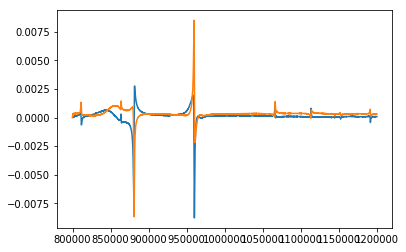

In [7]:
keys = list(df)
plt.plot(df[keys[0]],df[keys[1]])
plt.plot(df[keys[0]],df[keys[2]])

## Read in & Plot All of the Data

In [8]:
def get_files( path_to_dir, suffix=".csv" ):
    
    filenames = os.listdir(path_to_dir)
    list_files = [ filename for filename in filenames if filename.endswith( suffix ) ]

    # prepend the directory to each file_name
    return [os.path.join(path_to_dir,file_name) for file_name in list_files]



In [9]:
all_files = get_files(directory,suffix=exten)
for file in all_files:
    print(file)

../../2-Files_To_Analyze/31 May 18 TaV2/sp039_053118_TaV2_110.0K_800-1200kHz.tdms
../../2-Files_To_Analyze/31 May 18 TaV2/sp004_053118_TaV2_285.0K_800-1200kHz.tdms
../../2-Files_To_Analyze/31 May 18 TaV2/sp007_053118_TaV2_270.0K_800-1200kHz.tdms
../../2-Files_To_Analyze/31 May 18 TaV2/sp021_053118_TaV2_200.0K_800-1200kHz.tdms
../../2-Files_To_Analyze/31 May 18 TaV2/sp002_053118_TaV2_295.0K_800-1200kHz.tdms
../../2-Files_To_Analyze/31 May 18 TaV2/sp030_053118_TaV2_155.0K_800-1200kHz.tdms
../../2-Files_To_Analyze/31 May 18 TaV2/sp028_053118_TaV2_165.0K_800-1200kHz.tdms
../../2-Files_To_Analyze/31 May 18 TaV2/sp013_053118_TaV2_240.0K_800-1200kHz.tdms
../../2-Files_To_Analyze/31 May 18 TaV2/sp040_053118_TaV2_105.0K_800-1200kHz.tdms
../../2-Files_To_Analyze/31 May 18 TaV2/sp017_053118_TaV2_220.0K_800-1200kHz.tdms
../../2-Files_To_Analyze/31 May 18 TaV2/sp034_053118_TaV2_135.0K_800-1200kHz.tdms
../../2-Files_To_Analyze/31 May 18 TaV2/sp022_053118_TaV2_195.0K_800-1200kHz.tdms
../../2-Files_To

In [10]:
print("Number of Files: ",len(all_files))


Number of Files:  41


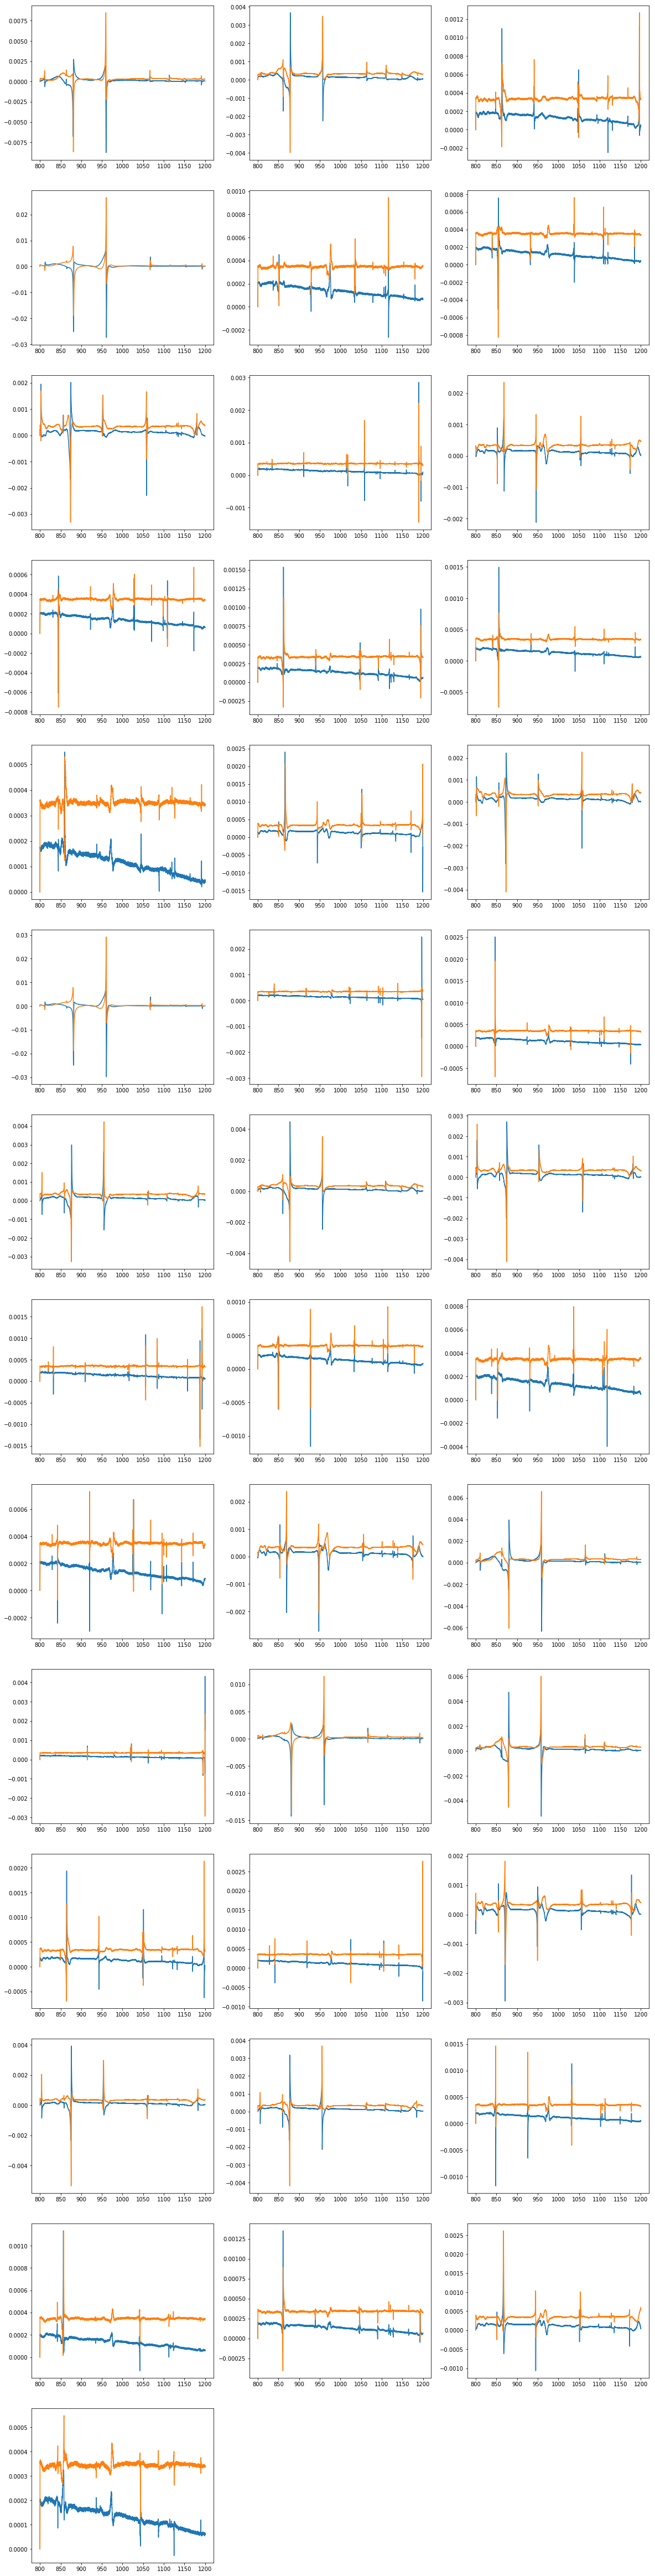

In [11]:
keys = list(df)
plt.figure(figsize=(20,85))

cols = 3
rows = np.ceil(len(all_files)/3)

for i in range(1,len(all_files)): 
    
    # store data in dataframe
    tdms_file = TdmsFile(all_files[i])
    df        = tdms_file.as_dataframe()
    
    # plot
    plt.subplot(rows,cols,i)
    #plt.xlabel("khz")
    #plt.ylabel("Magnitude V")
    plt.plot(df[keys[0]]/1000,df[keys[1]])
    plt.plot(df[keys[0]]/1000,df[keys[2]])
    

    

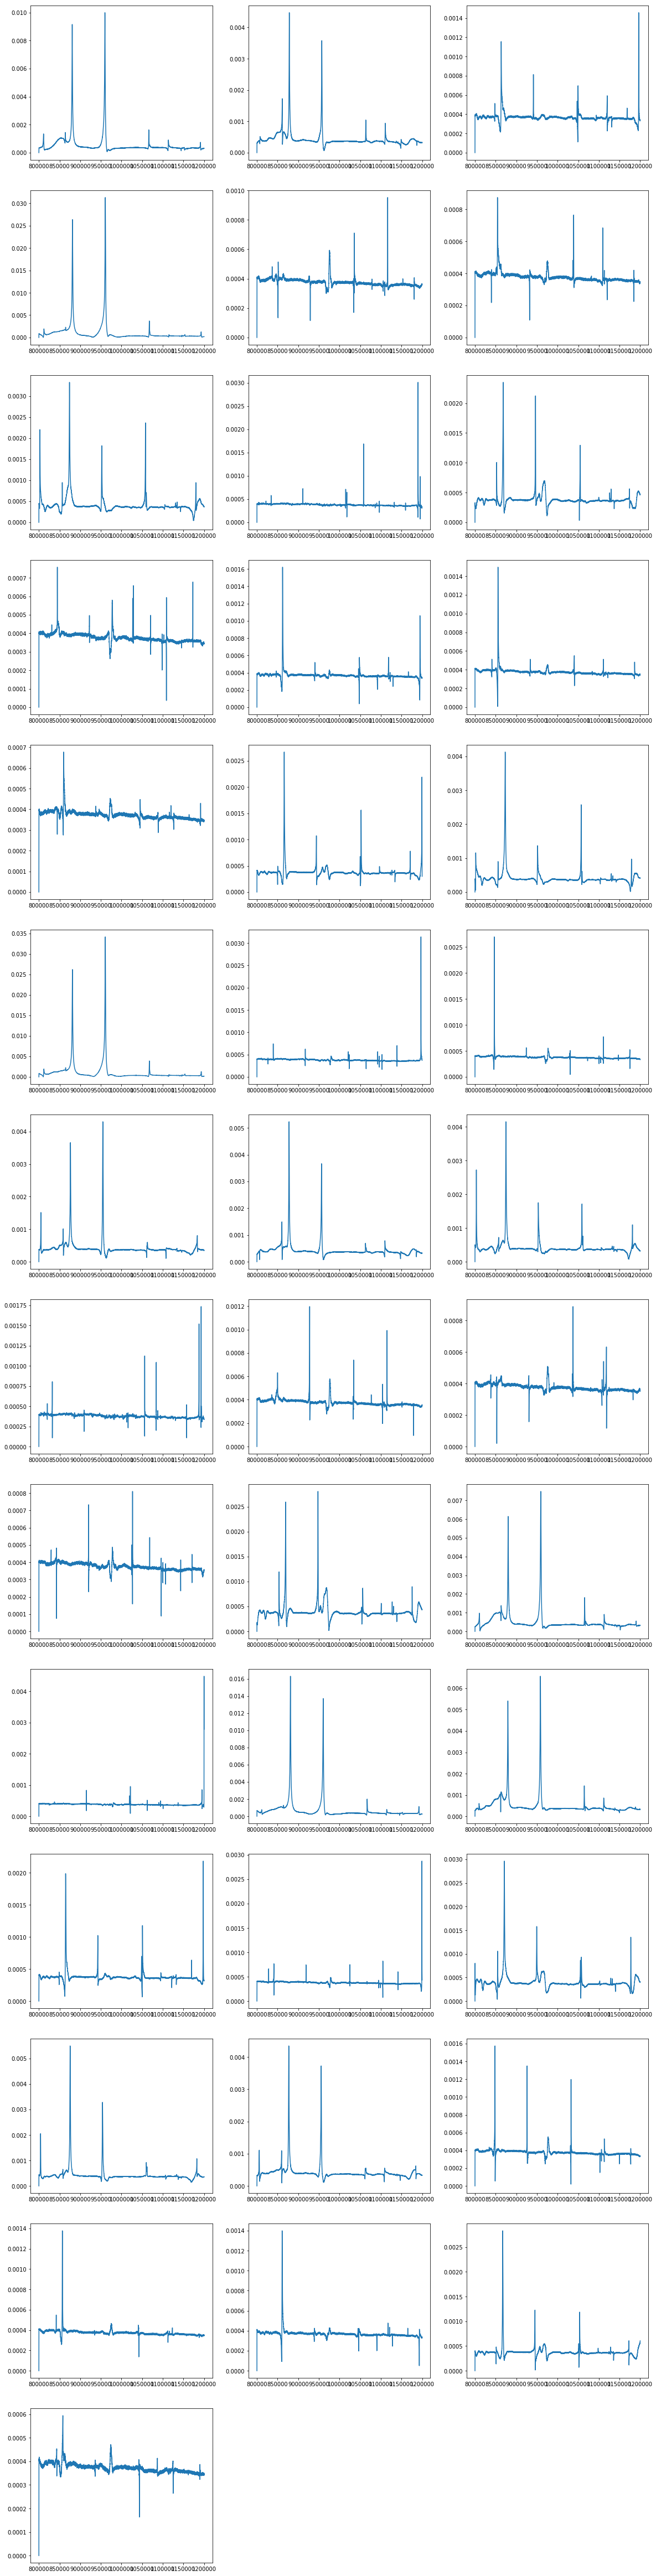

In [12]:
keys = list(df)
plt.figure(figsize=(20,85))

cols = 3
rows = np.ceil(len(all_files)/3)

for i in range(1,len(all_files)): 
    
    # store data in dataframe
    tdms_file = TdmsFile(all_files[i])
    df        = tdms_file.as_dataframe()
    
    # plot
    plt.subplot(rows,cols,i)
    quad = np.sqrt(df[keys[1]]**2 + df[keys[2]]**2)
    plt.plot(df[keys[0]],quad)
    

## Make Class

In [13]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nptdms import TdmsFile

class File_Data(object):
    """
    Stores all of the data associated with a single .tdms file in Dr. Ross's experiment.
    This class really is not neccesary, as everything is already stored just fine in the
    pandas dataframe. This class just stores the data in a way that is easier to handle
    """
    def __init__(self, path_to_direc, file_name):
        '''
        PARAMETERS:
            * path_to_direc = path to the directoru with the tdms file
            * file_name     = name of tdms file whose contents will be stored
        '''
        # Parameters
        self.full_file_path   = os.path.join(path_to_direc,file_name)
        
        # Data From File Name
        self.temperature     = float(file_name.split('_')[3].split('K')[0])
        self.frequency_range = file_name.split('_')[4].split('k')[0]
        self.date     = file_name.split('_')[1]
        self.date     = self.date[0:2]+"/"+self.date[2:4]+"/"+self.date[4:]
        self.compound = file_name.split('_')[2]
        
        # Data From File
        # - initialized in store_tdms_data method
        self.frequency       = None
        self.signal_x        = None
        self.signal_y        = None
        self.time            = None 
        self.idx             = None
        
        # key: [2-tuple]
        #    1. [int]    -> peak_number
        #    2. [string] -> [headers: Amplitude, ect...]
        # value: [float]
        self.peak_data  = {}
        self.peak_xcorr = []
        self.peak_index = []
    
    def store_tdms_data(self):

        # Read File
        tdms_file = TdmsFile(self.full_file_path)
        df = tdms_file.as_dataframe()
        
        # Rename Headers
        new_headers = []
        for header in list(df):
            new = header.replace("/'p'/", '').replace("/'fit'/",'').replace("'",'')
            new_headers.append(new)
        df.columns = new_headers      
        
        # store data
        for header in list(df):
            
            # store basic info
            if  header == 'Frequency': 
                self.frequency = np.array(df['Frequency'])
                continue
            if header == 'Signal X':  
                self.signal_x = np.array(df['Signal X'])
                continue
            if header == 'Signal Y':
                self.signal_y = np.array(df['Signal Y'])
                continue
            if header == 'sp time': 
                self.time = np.array(df['sp time'])[0]
                continue
            if header == 'sp idx':
                self.idx = np.array(df['sp idx'])[0]
                continue
            
            # parse into title and number
            first_num = None
            for i in range(len(header)):
                if header[i].isdigit():
                    first_num = i        
            peak_desc  = header[0:first_num] 
            peak_num   = int(header[first_num:])
            value      = float(df[header][0])
            
            # storing peak coordinates
            if peak_desc == "Peak":  
                freq    = value
                new_df  = df.loc[df['Frequency'] == freq]
                index   = new_df.index[0]
                #ycorr   = np.array(new_df['Signal Y'])[0]
                self.peak_xcorr.append(freq) 
                self.peak_index.append(index)
                continue
                
            # store peak data
            self.peak_data[(peak_num,peak_desc)] = value
        
        return 
      
    
    def __str__(self):
        
        total_str = ""
        total_str += "Date:        "+self.date+ '\n'
        total_str += "Compound:    "+self.compound + '\n'
        total_str += "Temperature: "+str(self.temperature) + 'K\n'
        total_str += "idx: "  + str(self.idx) + '\n'
        total_str += "time: " + str(self.time) + '\n'
        total_str += "Frequency Range: "+self.frequency_range + '\n'
        total_str += "Signal_x  Range: "+str(np.min(self.signal_x)) + "  -  "+ str(np.max(self.signal_x))+'\n'
        total_str += "Signal_y  Range: "+str(np.min(self.signal_y)) + "  -  "+ str(np.max(self.signal_y))+'\n'
        total_str += "Peaks:\n"
        for i in range(len(self.peak_xcorr)):
            total_str += "    "+str(i) + ".)"+"["+str(self.peak_xcorr[i])+", "+str(self.peak_index[i])+']\n'
            pass
        
        return total_str

In [14]:
directory = "../../2-Files_To_Analyze/31 May 18 TaV2/"
file      = "sp025_053118_TaV2_180.0K_800-1200kHz.tdms"

In [15]:
fd = File_Data(directory, file)
fd.store_tdms_data()

In [16]:
print(fd)

Date:        05/31/18
Compound:    TaV2
Temperature: 180.0K
idx: 25.0
time: 3610632608.78
Frequency Range: 800-1200
Signal_x  Range: -2.761430617e-05  -  0.00032453984475
Signal_y  Range: 0.0  -  0.0005483353656
Peaks:
    0.)[843299.989355728, 2165]
    1.)[852839.9921488017, 2642]
    2.)[858079.9913033843, 2904]
    3.)[973779.9991853535, 8689]
    4.)[1043539.9890411645, 12177]
    5.)[1087059.9944610149, 14353]
    6.)[1124939.9976804852, 16247]



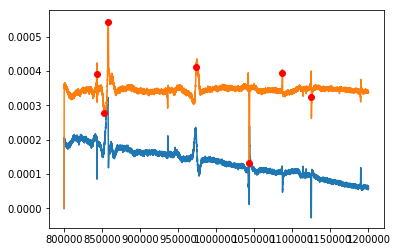

In [17]:
plt.plot(fd.frequency,fd.signal_x)
plt.plot(fd.frequency,fd.signal_y)
plt.plot(fd.peak_xcorr,fd.signal_y[fd.peak_index],'or')

In [18]:
def get_files(path_to_dir, suffix=".csv"):
    
    filenames = os.listdir(path_to_dir)
    list_files = [ filename for filename in filenames if filename.endswith( suffix ) ]

    # prepend the directory to each file_name
    return [os.path.join(path_to_dir,file_name) for file_name in list_files]

directory = "../../2-Files_To_Analyze/31 May 18 TaV2/"
exten = ".tdms"
all_files = get_files(directory,exten)

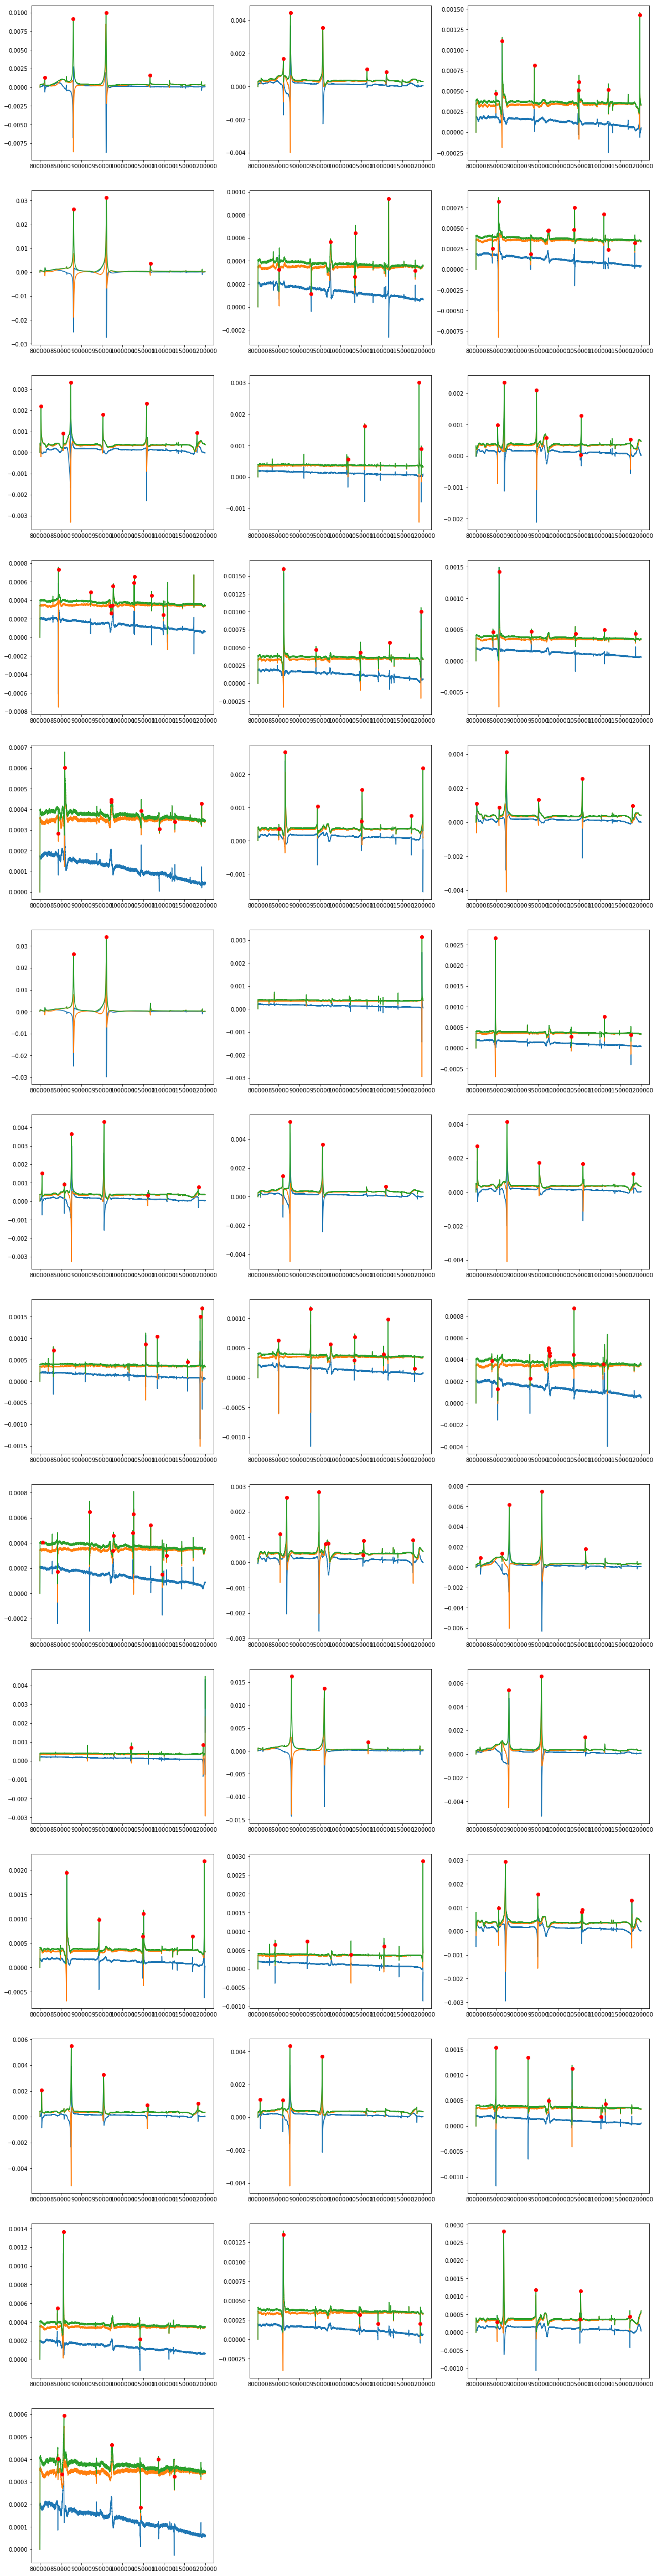

In [19]:
plt.figure(figsize=(20,85))

cols = 3
rows = np.ceil(len(all_files)/3)

for i in range(1,len(all_files)): 
    
    # store data in FileData
    f = File_Data(directory,all_files[i])
    f.store_tdms_data()
    
    # plot
    plt.subplot(rows,cols,i)
    plt.plot(f.frequency,f.signal_x)
    plt.plot(f.frequency,f.signal_y)
    
    quad = np.sqrt(f.signal_x**2+f.signal_y**2)
    plt.plot(f.frequency,quad)
    plt.plot(f.peak_xcorr,quad[f.peak_index],'or')
    
